In [298]:
import pandas as panda
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas

In [299]:
neighborhoods_data = panda.read_csv('neighborhoods_data.csv')

In [300]:
fire_incidents = panda.read_csv('fire_incidents_data.csv')
fire_incidents = fire_incidents[fire_incidents['neighborhood'].notna()]

In [301]:
dict = {}

for index, row in fire_incidents.iterrows():
    if row['neighborhood'] in dict:
        dict[row['neighborhood']] += 1
    else:
        dict[row['neighborhood']] = 1

dict

{'Fineview': 49,
 'Fairywood': 26,
 'South Side Flats': 269,
 'Allegheny Center': 62,
 'Lincoln-Lemington-Belmar': 197,
 'Carrick': 289,
 'Beechview': 147,
 'Allentown': 127,
 'Beltzhoover': 129,
 'Crafton Heights': 84,
 'Homewood North': 183,
 'Squirrel Hill South': 255,
 'Perry North': 111,
 'Bedford Dwellings': 45,
 'Homewood South': 193,
 'East Allegheny': 134,
 'Crawford-Roberts': 109,
 'Sheraden': 172,
 'Middle Hill': 105,
 'Strip District': 66,
 'East Hills': 156,
 'Garfield': 112,
 'Greenfield': 117,
 'North Shore': 65,
 'Spring Hill-City View': 107,
 'Central Business District': 274,
 'Upper Hill': 46,
 'Manchester': 80,
 'Overbrook': 58,
 'Polish Hill': 39,
 'Central Lawrenceville': 77,
 'Brookline': 195,
 'Marshall-Shadeland': 145,
 'North Oakland': 129,
 'South Oakland': 96,
 'Homewood West': 62,
 'East Liberty': 208,
 'Hazelwood': 249,
 'Squirrel Hill North': 135,
 'Friendship': 32,
 'West Oakland': 62,
 'Terrace Village': 86,
 'Brighton Heights': 154,
 'Troy Hill': 84,
 '

In [302]:
del dict['Mount Oliver Borough']
len(dict)

90

In [303]:
fire_incidents_neighborhood = panda.DataFrame.from_dict(dict, orient='index', columns=['Frequency'])
# fire_incidents_neighborhood = panda.DataFrame([dict.keys(), dict.values()]).T
# fire_incidents_neighborhood.columns= ['Neighborhood', 'Frequency']

In [304]:
fire_incidents_neighborhood

,Frequency
Fineview,49
Fairywood,26
South Side Flats,269
Allegheny Center,62
Lincoln-Lemington-Belmar,197
...,...
Arlington Heights,13
South Shore,23
Oakwood,13
Chartiers City,17


In [305]:
fire_incidents_neighborhood.sort_values(by=['Frequency'], ascending=False, inplace=True)

In [306]:
fire_incidents_neighborhood

,Frequency
Carrick,289
Central Business District,274
South Side Flats,269
Squirrel Hill South,255
Hazelwood,249
...,...
Oakwood,13
Ridgemont,12
Mt. Oliver,12
East Carnegie,11


<Axes: >

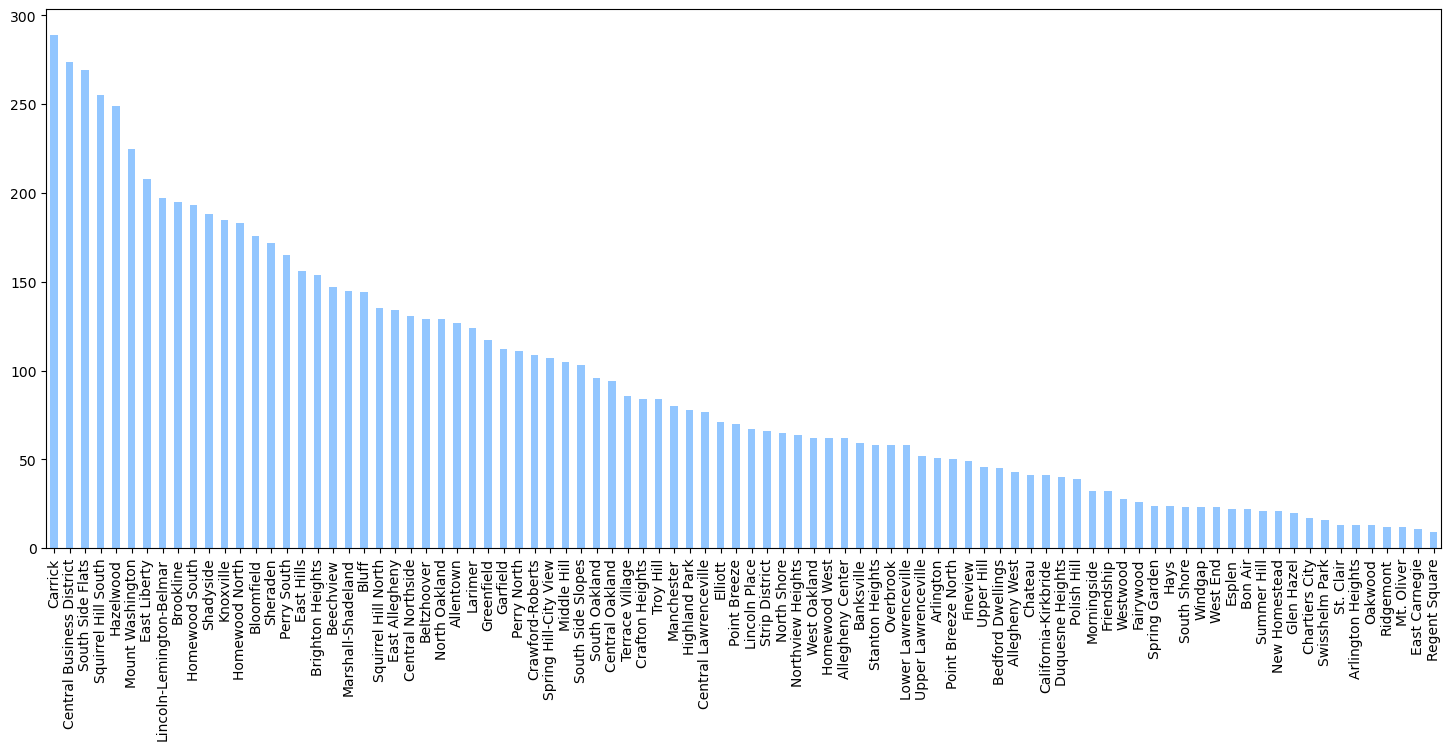

In [307]:
plt.rcParams["figure.figsize"] = (18, 7)
plt.style.use('seaborn-v0_8-pastel')
fire_incidents_neighborhood['Frequency'].plot(kind="bar")

In [308]:
population = panda.read_csv('population_data.csv')
population.columns = ['Neighborhood', 'Id', 'Total', 'Margin of Error']
population.head(10)

,Neighborhood,Id,Total,Margin of Error
0,Allegheny Center,1,1411.0,196.000000
1,Allegheny West,2,343.0,96.000000
2,Allentown,3,2558.0,449.773276
3,Arlington,4,1852.0,348.188168
4,Arlington Heights,5,272.0,126.000000
5,Banksville,6,3858.0,581.107563
6,Bedford Dwellings,7,1349.0,180.000000
7,Beechview,8,8078.0,719.658252
8,Beltzhoover,9,1702.0,343.072879
9,Bloomfield,10,8669.0,491.348145


In [309]:
population = population.drop([52])

In [310]:
fire_incidents_neighborhood.sort_index(inplace=True)
fire_incidents_neighborhood.insert(1, "Population", population['Total'].tolist(), 1)
fire_incidents_neighborhood

,Frequency,Population
Allegheny Center,62,1411.0
Allegheny West,43,343.0
Allentown,127,2558.0
Arlington,51,1852.0
Arlington Heights,13,272.0
...,...,...
Upper Lawrenceville,52,2754.0
West End,23,235.0
West Oakland,62,1717.0
Westwood,28,3537.0


In [311]:
fire_ratio = []
frequency_normalized = []
population_normalized = []
fireList = fire_incidents_neighborhood['Frequency'].tolist()
popList = fire_incidents_neighborhood['Population'].to_list()

maxFire = max(fireList)
minFire = min(fireList)
fireRange = maxFire - minFire

maxPop = max(popList)
minPop = min(popList)
popRange = maxPop - minPop

for i in range(len(fireList)):
    fireNorm = (fireList[i] - minFire) / fireRange
    if (popList[i] != minPop):
        popNorm = (popList[i] - minPop) / popRange
    else:
        popNorm = popList[i] / popRange
    ratio = fireNorm / popNorm
    fire_ratio.append(ratio)

In [312]:
for i in range(len(fire_ratio)):
    if fire_ratio[i] > 6:
        fire_ratio[i] = 6

In [313]:
fire_ratio_normalized = []

maxRate = max(fire_ratio)
minRate = min(fire_ratio)
rateRange = maxRate - minRate

for i in range(len(fire_ratio)):
    ratioNorm = (fire_ratio[i] - minRate) / rateRange
    fire_ratio_normalized.append(ratioNorm)

In [314]:
# scores_list = []
# max = fire_incidents_neighborhood['Frequency'].tolist()[0]

# for frequency in fire_incidents_neighborhood['Frequency'].tolist():
#     score = 1 - (frequency / max)
#     scores_list.append(score)

In [315]:
# fire_incidents_neighborhood.insert(1, "Scores", scores_list, True)

In [316]:
fire_incidents_neighborhood.insert(2, "Rating By Population", fire_ratio_normalized, True)

In [317]:
fire_incidents_neighborhood

,Frequency,Population,Rating By Population
Allegheny Center,62,1411.0,0.359370
Allegheny West,43,343.0,0.954702
Allentown,127,2558.0,0.440919
Arlington,51,1852.0,0.216860
Arlington Heights,13,272.0,0.141963
...,...,...,...
Upper Lawrenceville,52,2754.0,0.149226
West End,23,235.0,0.576114
West Oakland,62,1717.0,0.295211
Westwood,28,3537.0,0.051328


<Axes: >

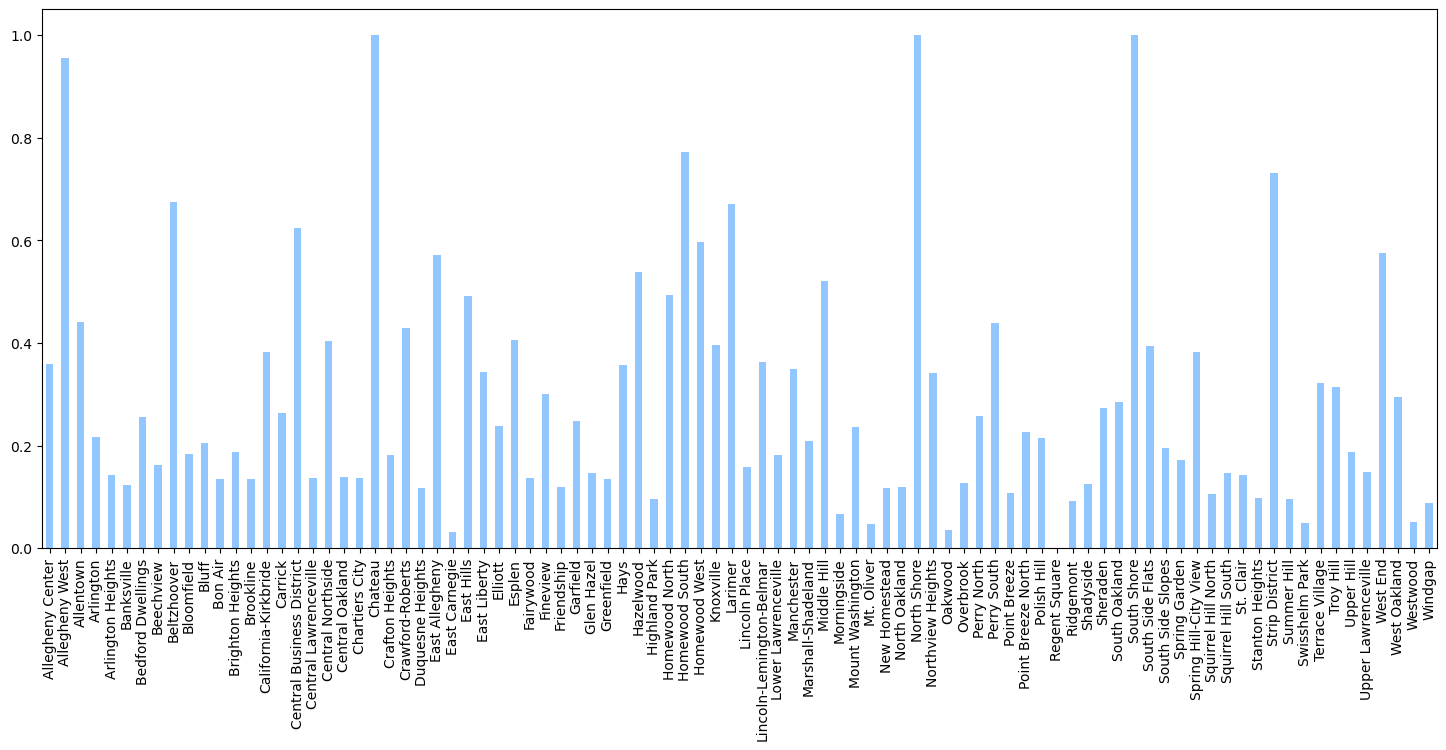

In [318]:
fire_incidents_neighborhood["Rating By Population"].plot.bar()

In [319]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
# neighborhoods.plot() # plot the geopandas dataframe

In [320]:
steps_map = neighborhoods.merge(fire_incidents_neighborhood, 
                                how='left', 
                                left_on='hood', 
                                right_on=fire_incidents_neighborhood.index)

Text(0.5, 69.97084282383948, 'Fire Incidents by Neighborhood')

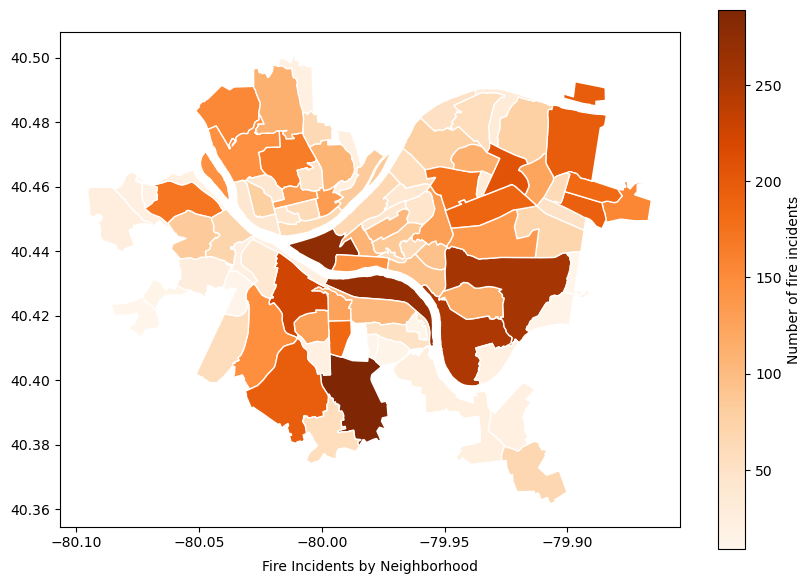

In [321]:
# draw a choropleth map using data from the column named "number_of_steps"
steps_map.plot(column='Frequency',
               cmap='Oranges',
               edgecolor='white',
               legend=True,
               legend_kwds={'label': "Number of fire incidents"},
               figsize=(10, 7),
               missing_kwds={"color": "lightgrey"})
plt.xlabel("Fire Incidents by Neighborhood", labelpad=7)

Text(0.5, 69.97084282383948, 'Fire Incidents by Population Rating')

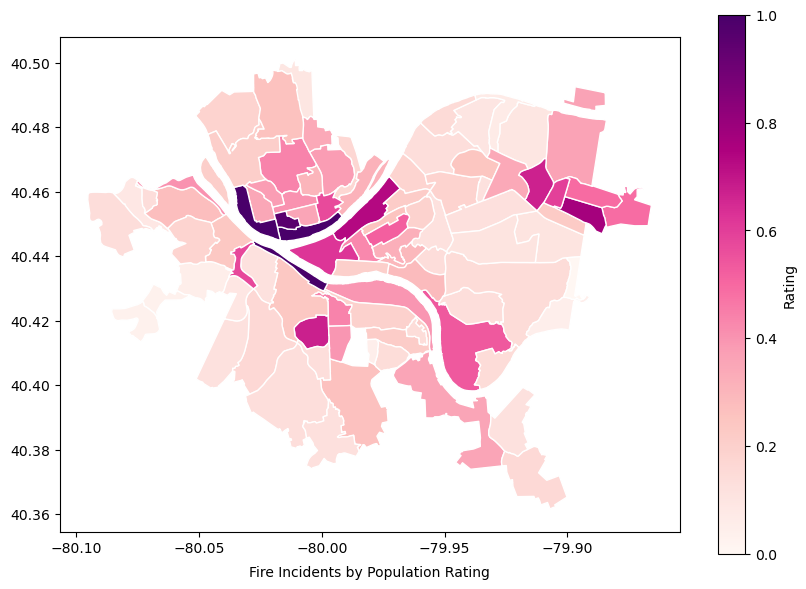

In [322]:
steps_map.plot(column='Rating By Population',
               cmap='RdPu',
               edgecolor='white',
               legend=True,
               legend_kwds={'label': "Rating"},
               figsize=(10, 7),
               missing_kwds={"color": "lightgrey"})
plt.xlabel("Fire Incidents by Population Rating", labelpad=7)

In [325]:
fire_incidents_neighborhood.sort_values(by=['Rating By Population'], ascending=False, inplace=True)
fire_incidents_neighborhood.head(20)

,Frequency,Population,Rating By Population
North Shore,65,205.0,1.000000
Chateau,41,3.0,1.000000
South Shore,23,12.0,1.000000
Allegheny West,43,343.0,0.954702
Homewood South,193,2276.0,0.772834
Strip District,66,747.0,0.731425
Beltzhoover,129,1702.0,0.674304
Larimer,124,1641.0,0.670273
Central Business District,274,4060.0,0.623604
Homewood West,62,850.0,0.597393
